July: Bathymetry, coordinates, bdy and init conditions, and namelist changes for configuration for AGRIF.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot

# 1. Realistic Bathymetry

[final_bathymetry.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/bathymetry/notebooks/final_bathymetry.ipynb)

## Orcinus:

    /home/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/realistic/real_bathy_for_agrif.nc

In [2]:
real_bathy_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/realistic/real_bathy_for_agrif.nc')

Current model resolution:  (190, 255)


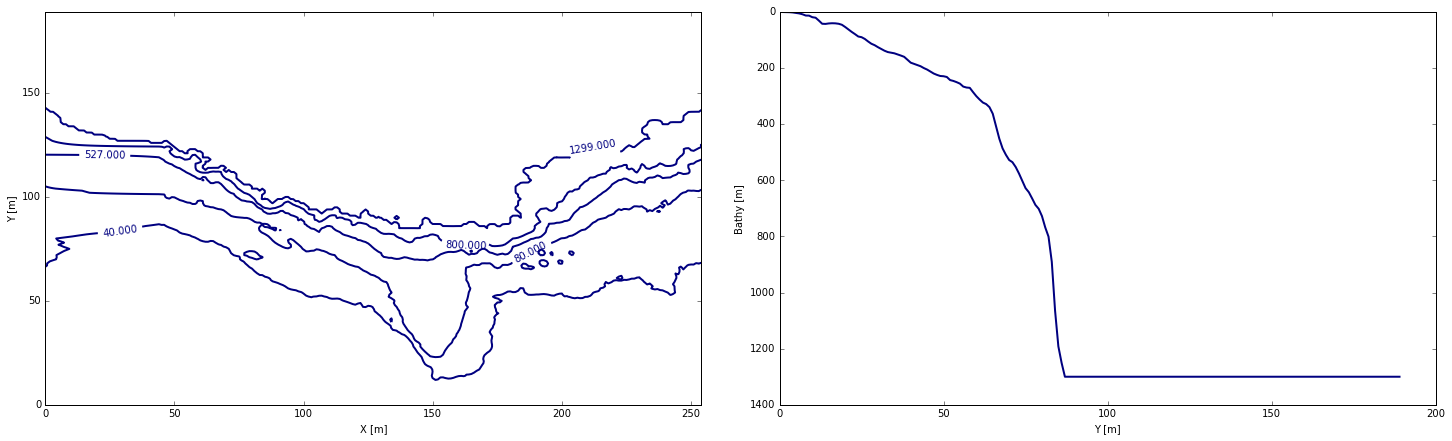

In [3]:
rbathy = real_bathy_file['Bathymetry'][:]

print('Current model resolution: ', rbathy.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plt.tight_layout(w_pad=5)
c1 = ax1.contour(rbathy, levels = [0, 40, 80, 527, 800, 1299], colors='Navy', linewidths=2)
ax1.clabel(c1, inline=1, fontsize=10)
ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')

ax2.plot(rbathy[:,150], color='Navy', linewidth=2)
ax2.invert_yaxis()
ax2.set_xlabel('Y [m]')
ax2.set_ylabel('Bathy [m]')
plt.show()

# 2. Idealized Bathymetry

[final_bathymetry.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/bathymetry/notebooks/final_bathymetry.ipynb)

## Orcinus:

    /home/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif.nc


In [4]:
ideal_bathy_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif.nc')

Current model resolution:  (190, 255)


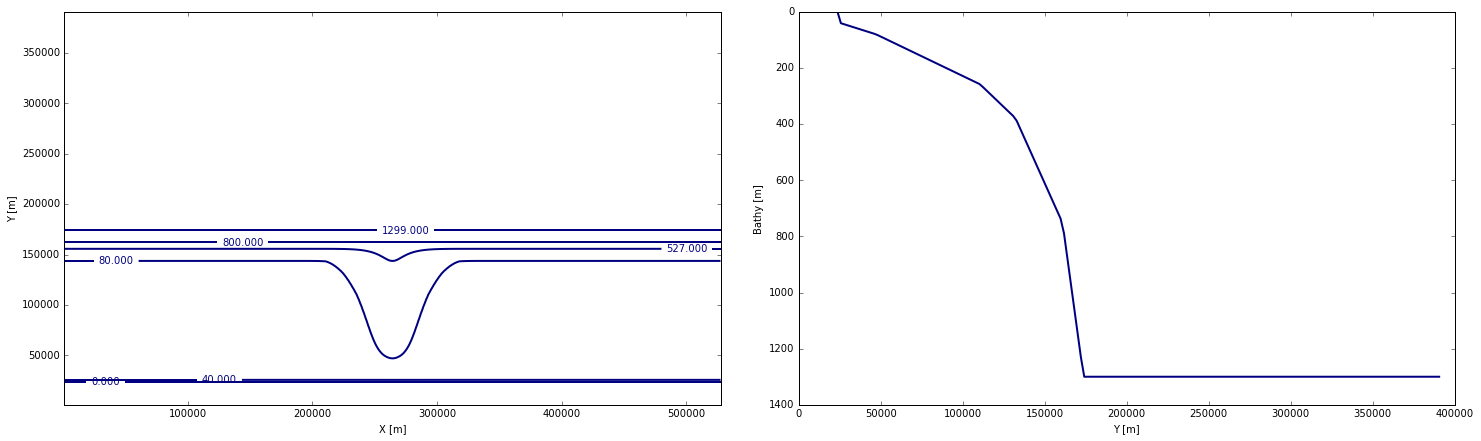

In [5]:
ibathy = ideal_bathy_file['Bathymetry'][:]
iX = ideal_bathy_file['X'][:]
iY = ideal_bathy_file['Y'][:]

print('Current model resolution: ', ibathy.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plt.tight_layout(w_pad=5)
c1 = ax1.contour(iX, iY, ibathy, levels = [0, 40, 80, 527, 800, 1299], colors='Navy', linewidths=2)
ax1.clabel(c1, inline=1, fontsize=10)
ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')

ax2.plot(iY[:,127], ibathy[:,127], color='Navy', linewidth=2)
ax2.invert_yaxis()
ax2.set_xlabel('Y [m]')
ax2.set_ylabel('Bathy [m]')
plt.show()

# 3. Geographic Grid

[final_bathymetry.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/bathymetry/notebooks/final_bathymetry.ipynb)

## Orcinus:
    /home/imachuca/Canyons/mackenzie_canyon/coordinates/raw_coordinates/grid_for_agrif.nc

In [6]:
grid_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/coordinates/raw_coordinates/grid_for_agrif.nc')

(258, 193) (258, 193)


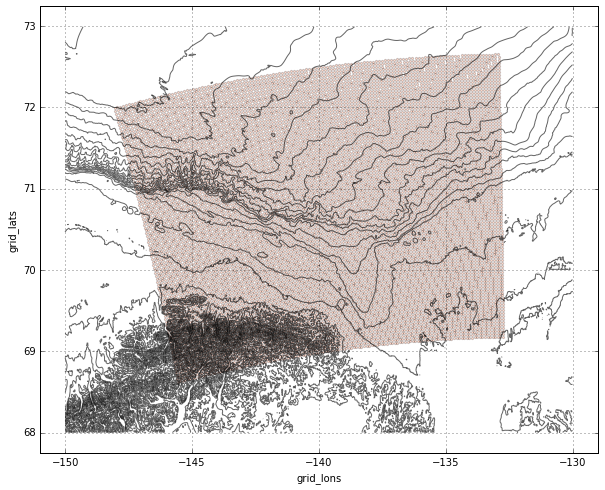

In [7]:
grid_lons = grid_file['grid_lons']
grid_lats = grid_file['grid_lats']

print(grid_lons.shape, grid_lats.shape)

x_region, y_region, z_region = functions_plot.def_regionG(-150, -130, 68, 73)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig, ax = functions_plot.plot_region(fig, ax, x_region, y_region, z_region)
ax.scatter(grid_lons[::2,::2], grid_lats[::2,::2], c='orangered', s=5, alpha=0.2)
ax.grid(); ax.set_ylabel('grid_lats'); ax.set_xlabel('grid_lons')

# 4. Coordinates

[coordinates_from_grid_corrected.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/bathymetry/notebooks/coordinates_from_grid_corrected.ipynb)

## Orcinus:

    /home/imachuca/Canyons/mackenzie_canyon/coordinates/NEMO_files/coords_for_agrif.nc

In [8]:
coord_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/coordinates/NEMO_files/coords_for_agrif.nc')

(190, 255) (1, 190, 255)


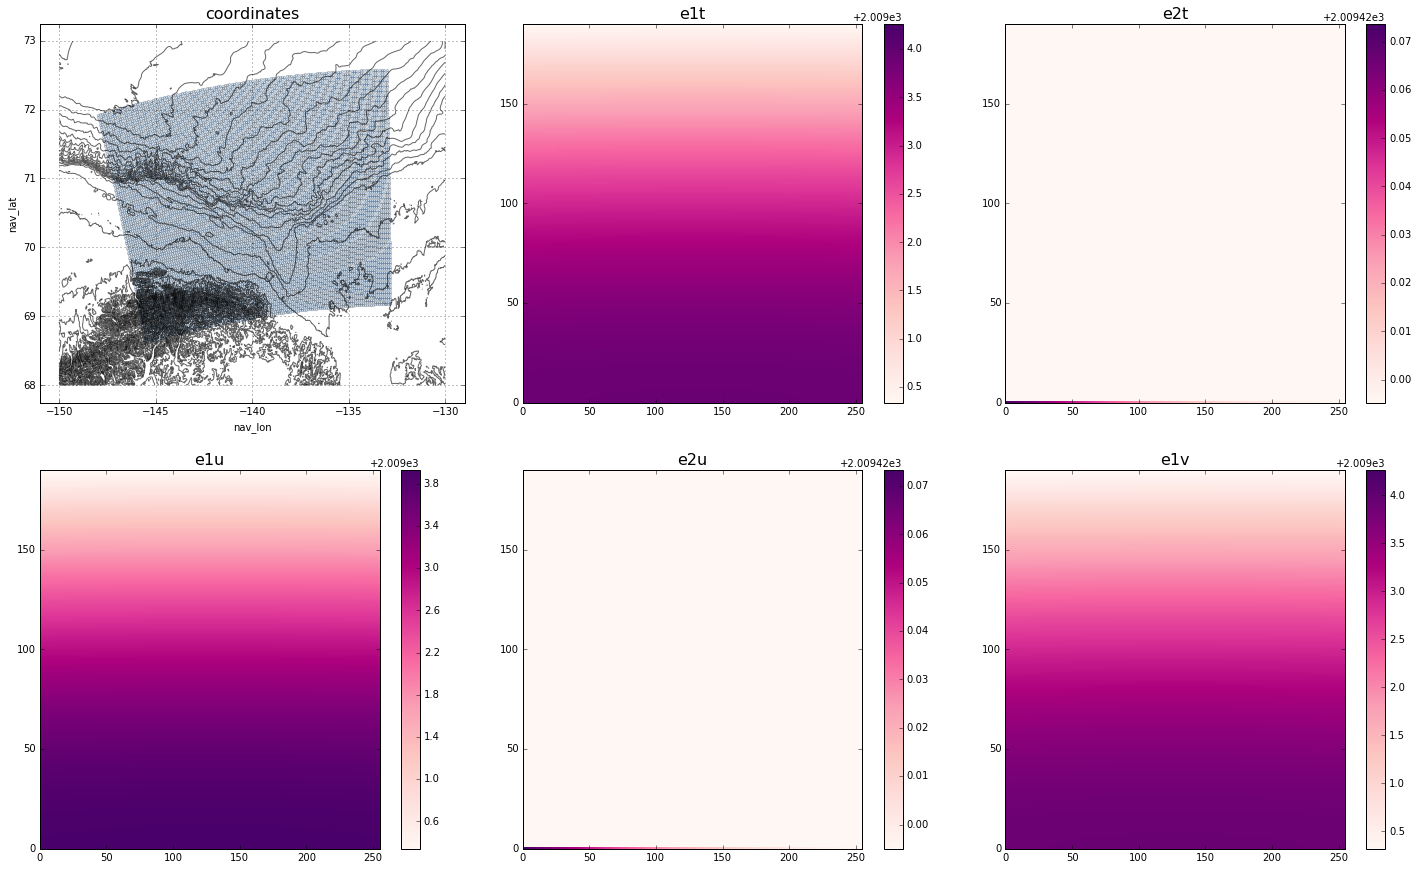

In [9]:
nav_lon = coord_file['nav_lon']
nav_lat = coord_file['nav_lat']
e1t = coord_file['e1t']
e2t = coord_file['e2t']
e1u = coord_file['e1u']
e2u = coord_file['e2u']
e1v = coord_file['e1v']

print(nav_lon.shape, e1t.shape)

fig, axs = plt.subplots(2,3, figsize=(20,12))
plt.tight_layout(h_pad=5, w_pad=3)
ax=axs.ravel()
ttls = ['coordinates', 'e1t', 'e2t', 'e1u', 'e2u', 'e1v']
for i, var, ttl in zip(np.arange(6), [None, e1t, e2t, e1u, e2u, e1v], ttls):
    if i==0:
        fig, ax[i] = functions_plot.plot_region(fig, ax[i], x_region, y_region, z_region)
        ax[i].scatter(nav_lon[::2,::2], nav_lat[::2,::2], c='dodgerblue', s=5, alpha=0.2)
        ax[i].set_ylabel('nav_lat'); ax[i].set_xlabel('nav_lon')
        ax[i].grid(); ax[i].set_title(ttl, fontsize=16)
    else:    
        p = ax[i].pcolor(var[0,:,:], cmap=cm.RdPu)
        fig.colorbar(p, ax=ax[i]); ax[i].set_title(ttl, fontsize=16)
        ax[i].set_xlim(0,var.shape[2]); ax[i].set_ylim(0,var.shape[1])

# 5. Depth Levels

[depth_levels.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/bathymetry/notebooks/depth_levels.ipynb)

## Orcinus:
    /home/imachuca/Canyons/results_mackenzie/idealized/Resolution_for_agrif_255x190/create_mesh_mask_run/unique_directory

In [10]:
mask_file = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/idealized/Resolution_for_agrif_255x190/create_mesh_mask_run/unique_directory/mesh_mask.nc')

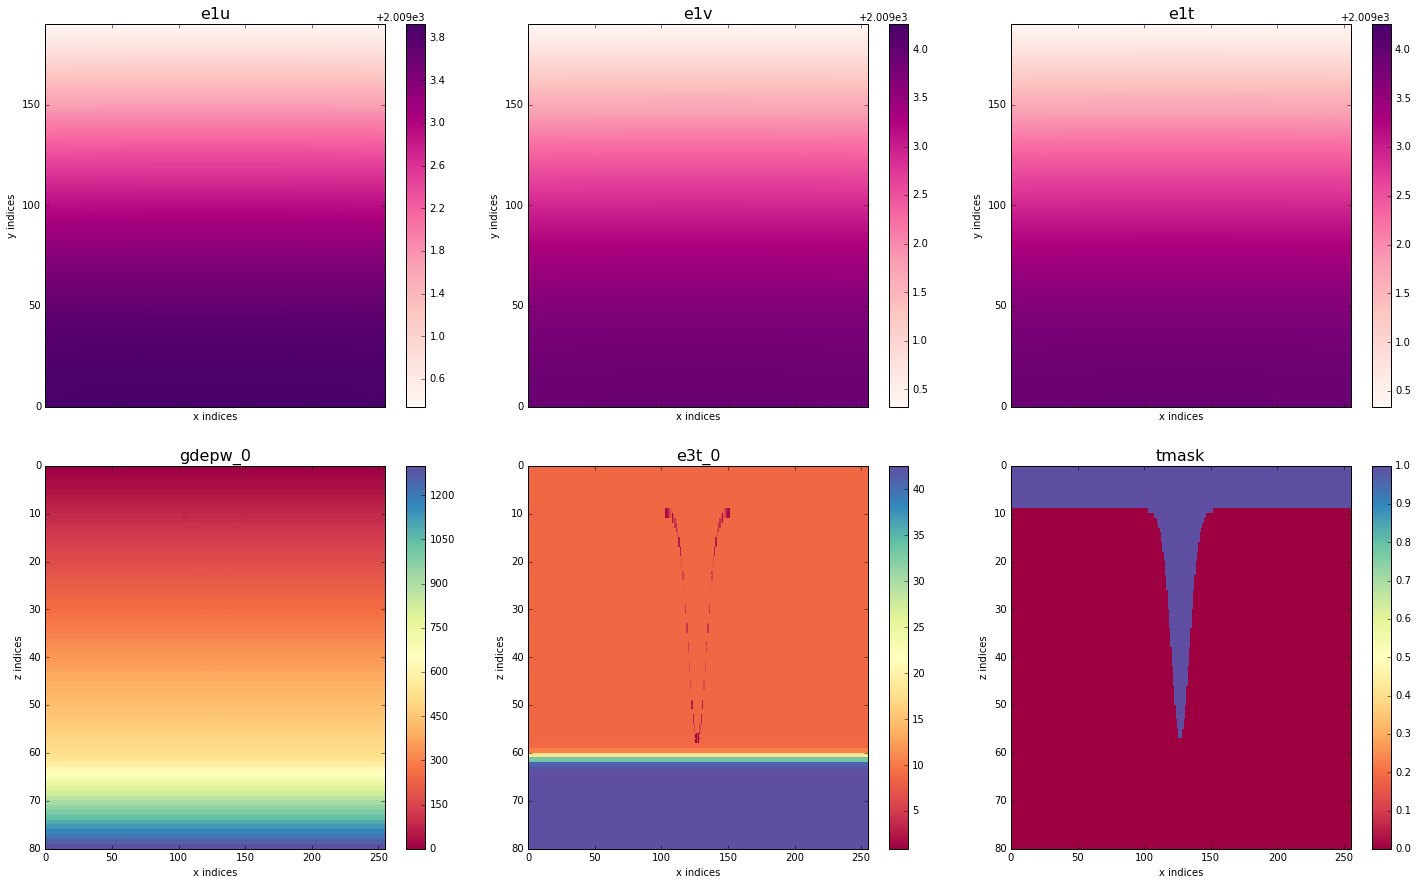

In [11]:
e1u = mask_file['e1u']
e1v = mask_file['e1v']
e1t = mask_file['e1t']
gdepw_1d = mask_file['gdepw_1d'][0,...]
gdepw_0 = mask_file['gdepw_0'][0,...]
e3t_0 = mask_file['e3t_0'][0,...]
tmask = mask_file['tmask'][0,...]

depth_shelf = gdepw_1d[np.argmin(np.abs(gdepw_1d - 80))]
ind_plane = np.argmin(np.abs(ibathy[:,0] - depth_shelf))

fig, axs = plt.subplots(2,3, figsize=(20,12), sharex=True)
plt.tight_layout(h_pad=5, w_pad=3)
ax=axs.ravel()
ttls = ['e1u', 'e1v', 'e1t', 'gdepw_0', 'e3t_0', 'tmask']
for i, var, ttl in zip(np.arange(6), [e1u, e1v, e1t, gdepw_0, e3t_0, tmask], ttls):
    ax[i].set_xlim(0,var.shape[-1]); ax[i].set_xlabel('x indices')
    if i==0 or i==1 or i==2:
        p = ax[i].pcolor(var[0,:,:], cmap=cm.RdPu)
        fig.colorbar(p, ax=ax[i]); ax[i].set_title(ttl, fontsize=16)
        ax[i].set_ylim(0,var.shape[1]); ax[i].set_ylabel('y indices')  
    else:
        p = ax[i].pcolor(var[:,ind_plane,:], cmap=cm.Spectral)
        fig.colorbar(p, ax=ax[i]); ax[i].set_title(ttl, fontsize=16)
        ax[i].invert_yaxis(); ax[i].set_ylabel('z indices')

# 6. Temperature and Salinity

[make_stratification.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/conditions/notebooks/make_stratification.ipynb)

## Orcinus:

    /home/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/temperature/temperature_for_agrif.nc
    
    /home/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/salinity/salinity_for_agrif.nc

In [12]:
temp_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/temperature/temperature_for_agrif.nc')

In [13]:
sal_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/salinity/salinity_for_agrif.nc')

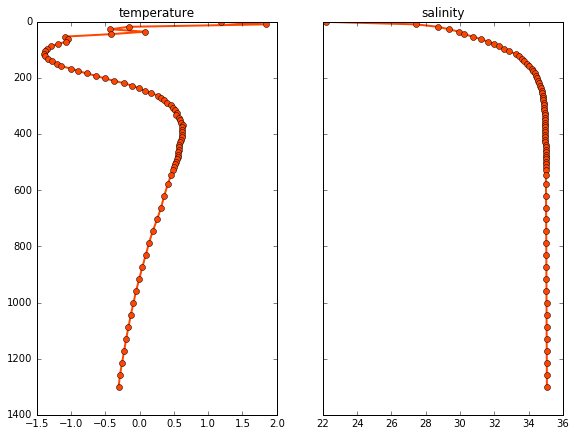

In [14]:
votemper = temp_file['votemper']
vosaline = sal_file['vosaline']
deptht = temp_file['deptht']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,6), sharey=True)
plt.tight_layout(h_pad=5, w_pad=3)
ax1.plot(votemper[0,:,-1,-1], gdepw_1d, c='orangered', lw=2, marker='o')
ax2.plot(vosaline[0,:,-1,-1], gdepw_1d, c='orangered', lw=2, marker='o')
ax1.set_ylim(1400,0); ax2.set_ylim(1400,0)
ax1.set_title('temperature'); ax2.set_title('salinity')

# 7. SSH + Barotropic Velocities and Baroclinic Velocities

[ekman_velocities_boundary.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/conditions/notebooks/ekman_velocities_boundary.ipynb)

## Orcinus:

    /home/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/bdy/bdy2d_for_agrif_m01.nc
    
    /home/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/bdy/bdy3d_for_agrif_m01.nc

In [15]:
tropic_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/bdy/bdy2d_for_agrif_m01.nc')

In [16]:
clinic_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/bdy/bdy3d_for_agrif_m01.nc')

In [17]:
vobtcrtx = tropic_file['vobtcrtx']
vobtcrty = tropic_file['vobtcrty']
vozocrtx = clinic_file['vozocrtx']
vomecrty = clinic_file['vomecrty']

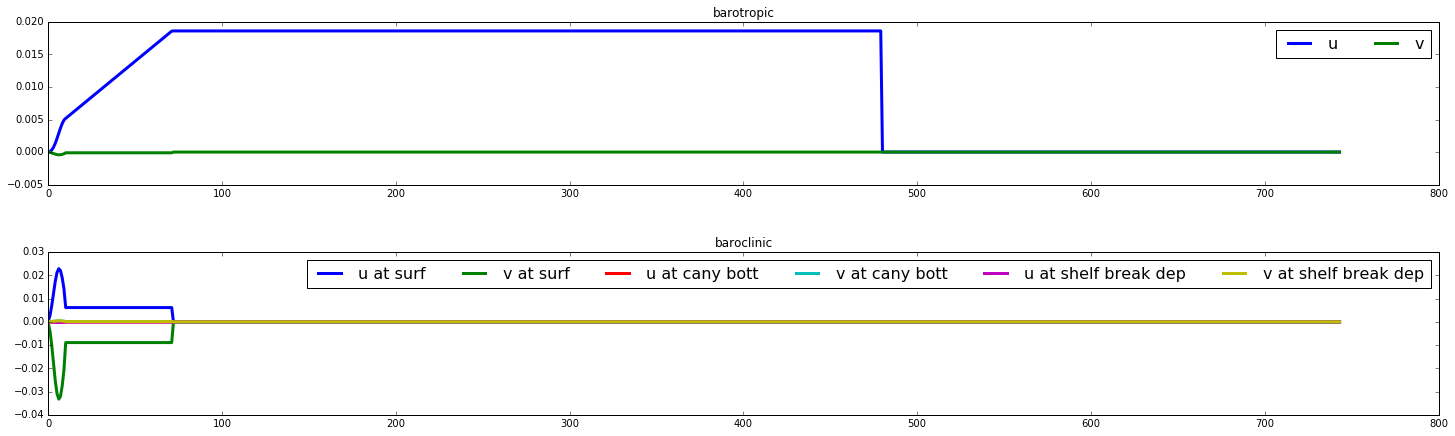

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,6))
plt.tight_layout(h_pad=5, w_pad=3); lw=3
ax1.set_title('barotropic'); ax2.set_title('baroclinic')
ax1.plot(vobtcrtx[:,0, -1], lw = lw, label='u')
ax1.plot(vobtcrty[:,0, -1], lw = lw, label = 'v')
ax2.plot(vozocrtx[:,0,0, -1], lw = lw, label='u at surf')
ax2.plot(vomecrty[:,0,0, -1], lw = lw, label = 'v at surf')
ax2.plot(vozocrtx[:,60,0, -1], lw = lw, label='u at cany bott')
ax2.plot(vomecrty[:,60,0, -1], lw = lw, label = 'v at cany bott')
ax2.plot(vozocrtx[:,9,0, -1], lw = lw, label='u at shelf break dep')
ax2.plot(vomecrty[:,9,0, -1], lw = lw, label = 'v at shelf break dep')
ax1.legend(ncol=2, fontsize=16); ax2.legend(ncol=6, fontsize=16)

# 8. Yaml

      coordinates: coords_for_agrif.nc
      bathymetry: ideal_bathy_for_agrif.nc

# 9. Namelist

       nn_itend    =   172800
       nn_date0    =  20170101
       ln_rstart   =   .false.
       nn_euler    =        1
       nn_rstctl   =        0
       nn_stock    =   172800
       nn_write    =     360
       jpidta      =     255
       jpjdta      =     190
       jpkdta      =      80 
       ln_zps      = .true.
       rn_rdt      =   10.
       ppkth       =  62.0
       ppacr       =  1.0
       ppdzmin     =  8.75
       pphmax      =  1300.0
       ldbletanh   =  .FALSE.
       ln_bt_nn_auto =    .False.
       nn_baro       =    4
       sn_tem  = 'temperature/temperature_for_agrif.nc'
       sn_sal  = 'salinity/salinity_for_agrif.nc'
       bn_ssh =     'bdy2d_for_agrif' 
       bn_u2d =     'bdy2d_for_agrif' 
       bn_v2d =     'bdy2d_for_agrif' 
       bn_u3d  =    'bdy3d_for_agrif' 
       bn_v3d  =    'bdy3d_for_agrif' 
       bn_tem  =    'bdy3d_for_agrif' 
       bn_sal  =    'bdy3d_for_agrif' 
       nbdyend   = 255
       

# 10. Run

The yaml, namelists, and iodef files are in:

    /home/imachuca/Canyons/mackenzie_canyon/runs/idealized/Resolution_for_agrif_255x190/Run_for_Michael
    

Running command (example):

    nemo run mackenzie03_ideal.yaml /home/imachuca/Canyons/results_mackenzie/idealized/Resolution_for_agrif_255x190/test01
    
Running 6x6 for 1 minute ends at 326th timestep.

Test results are in:

    /home/imachuca/Canyons/results_mackenzie/idealized/Resolution_for_agrif_255x190/test01
    
File permissions:

    drwxrwxr-x  22 imachuca    wg-moad      4096 Jun 15 18:50 imachuca/
    drwxrwxr-x  4 imachuca wg-moad  4096 Mar 22 15:40 Canyons/
    drwxrwxr-x 12 imachuca wg-moad 4096 Jun 19 15:48 mackenzie_canyon/
    drwxrwxr-x  4 imachuca wg-moad 4096 Mar 22 17:53 results_mackenzie/
    drwxrwxr-x  3 imachuca wg-moad  4096 Jul  9 00:11 Resolution_for_agrif_255x190/
    
    ... etc
   